ICAの実装：異なる２つの信号源を異なる比率で混ぜた観測データ２つを用いる

In [68]:
import numpy as np
import matplotlib.pylab as plt

In [69]:
#データの整形
arr1 = np.loadtxt('dat1.txt')
arr2 = np.loadtxt('dat2.txt')
data1 = arr1.tolist()
data2 = arr2.tolist()
data1 -= np.mean(data1)
data2 -= np.mean(data2)
data = [data1, data2]
datax = np.asmatrix(data)

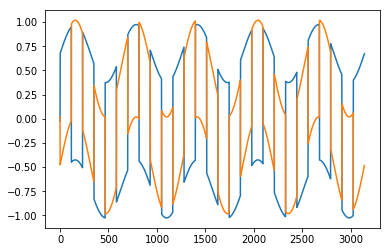

In [70]:
#観測データ
datax_plot = np.asarray(datax)
plt.plot(datax_plot[0])
plt.plot(datax_plot[1])

In [71]:
#データを白色化する
sigma = np.cov(datax, rowvar=True, bias=True)
D, E = np.linalg.eigh(sigma)
E = np.asmatrix(E)
Dh = np.diag(np.array(D) ** (-1/2))
V = E * Dh * E.T
z = V * datax

In [72]:
#確認用
np.cov(z, rowvar=True, bias=True)

array([[1.00000000e+00, 4.68116952e-16],
       [4.68116952e-16, 1.00000000e+00]])

In [73]:
#大きさを１にして正規化する
def normalize(x): #正規化
    if x.sum() < 0:
        x *= -1
    return x / np.linalg.norm(x)

In [74]:
r0 = 0.0001#収束半径
#yの尖度を最大化
W = np.empty((0, 2))
for i in range(2):
    vec_w = np.random.rand(2,1)
    vec_w = normalize(vec_w)
    while True:
        vec_w_pre = vec_w
        vec_w = np.asmatrix((np.asarray(z)*np.asarray(vec_w.T*z)**3).mean(axis=1)).T - 3*vec_w
        #直交化法と正規化
        vec_w = normalize(np.linalg.qr(np.asmatrix(np.concatenate((W, vec_w.T), axis=0)).T)[0].T[-1].T)
        if np.linalg.norm(vec_w - vec_w_pre) < r0:#収束判定
            W = np.concatenate((W, vec_w.T), axis=0)
            break
y = W * z

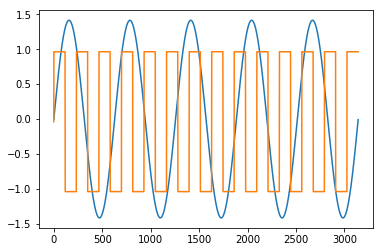

In [75]:
#信号源データ
y = np.asarray(y)
plt.plot(y[0])
plt.plot(y[1])